# 6. Softmax Regression

### Softmax Classification

> Multinomial classification
- hypothesis = tf.nn.softmax(tf.matmul(X,W)+b)

In [4]:
from tqdm import tqdm_notebook
import tensorflow as tf
import numpy as np
from IPython.display import Image 


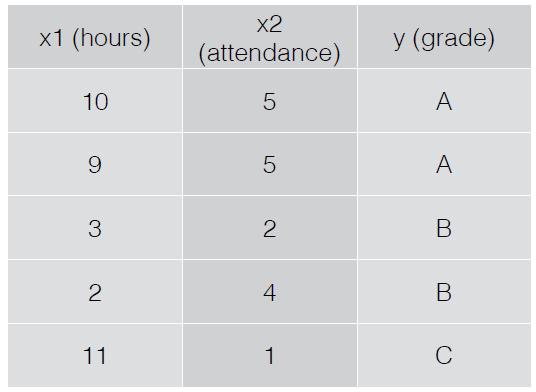

In [5]:
Image('./images/1.png')

>  분류 모형
- 이진 분류면 : sigmoid사용
- 이진 분류 이상이면: softmax 사용

In [7]:
tf.set_random_seed(777)  # for reproducibility

x_data = [[10,5], [9,5], [3,2], [2,4], [11,1]]
y_data = [[1, 0, 0], 
          [1, 0, 0], 
          [0, 1, 0], 
          [0, 1, 0],
          [0, 0, 1]]

X = tf.placeholder("float", [None, 2])
Y = tf.placeholder("float", [None, 3])
nb_classes = 3

W = tf.Variable(tf.random_normal([2, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [8]:
# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in tqdm_notebook(range(2001)):
    sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
    if step % 200 == 0:
        # print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}))
        print("Step : {}, \t Cost : {}".format(step, sess.run(cost, feed_dict={X: x_data, Y: y_data})))

Step : 0, 	 Cost : 5.626882076263428
Step : 200, 	 Cost : 0.0699038878083229
Step : 400, 	 Cost : 0.04134545847773552
Step : 600, 	 Cost : 0.029694462195038795
Step : 800, 	 Cost : 0.02323530614376068
Step : 1000, 	 Cost : 0.019105542451143265
Step : 1200, 	 Cost : 0.0162307471036911
Step : 1400, 	 Cost : 0.014111995697021484
Step : 1600, 	 Cost : 0.012484771199524403
Step : 1800, 	 Cost : 0.01119527779519558
Step : 2000, 	 Cost : 0.010148045606911182



In [10]:
# Testing & One-hot encoding
test_data = [[9.5, 5.5], 
             [9.9, 1.5], 
             [3.1, 2.1]]

pred_val = sess.run(hypothesis, feed_dict={X: test_data})
pred_idx = sess.run(tf.argmax(pred_val, 1))

# print("predict value : \n {} \n\npredict index : {}".format(pred_val, pred_idx))
print("test data : {} \n\npredict value : \n {} \n\npredict index : {}".format(test_data, pred_val, pred_idx))

test data : [[9.5, 5.5], [9.9, 1.5], [3.1, 2.1]] 

predict value : 
 [[9.9236065e-01 7.6043038e-03 3.4973971e-05]
 [2.2979869e-02 5.3674785e-07 9.7701955e-01]
 [3.1210743e-02 9.6435183e-01 4.4374056e-03]] 

predict index : [0 2 1]


In [11]:
# grade로 예측값 표기
grade = ['A', 'B', 'C']
arg_val = sess.run(tf.arg_max(pred_val, 1))
p_grade = [ grade[val] for val in arg_val ]
print(p_grade)

W0911 15:07:01.877734  6808 deprecation.py:323] From <ipython-input-11-93abe8ccf7f2>:3: arg_max (from tensorflow.python.ops.gen_math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.math.argmax` instead


['A', 'C', 'B']


## 더 복잡한 Classification

In [12]:
import tensorflow as tf

tf.set_random_seed(777)  # for reproducibility

x_data = [[1, 2, 1, 1], 
          [2, 1, 3, 2], 
          [3, 1, 3, 4], 
          [4, 1, 5, 5],
          [1, 7, 5, 5], 
          [1, 2, 5, 6], 
          [1, 6, 6, 6], 
          [1, 7, 7, 7]]

y_data = [[0, 0, 1], 
          [0, 0, 1], 
          [0, 0, 1], 
          [0, 1, 0],
          [0, 1, 0], 
          [0, 1, 0], 
          [1, 0, 0], 
          [1, 0, 0]]

X = tf.placeholder("float", [None, 4])
Y = tf.placeholder("float", [None, 3])
nb_classes = 3

W = tf.Variable(tf.random_normal([4, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [13]:
# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in tqdm_notebook(range(2001)):
    sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
    if step % 200 == 0:
        # print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}))
        print("Step : {}, \t Cost : {}".format(step, sess.run(cost, feed_dict={X: x_data, Y: y_data})))

Step : 0, 	 Cost : 5.266112804412842
Step : 200, 	 Cost : 0.5833661556243896
Step : 400, 	 Cost : 0.4858381152153015
Step : 600, 	 Cost : 0.4095403254032135
Step : 800, 	 Cost : 0.33916717767715454
Step : 1000, 	 Cost : 0.26745450496673584
Step : 1200, 	 Cost : 0.22873026132583618
Step : 1400, 	 Cost : 0.20815607905387878
Step : 1600, 	 Cost : 0.190830260515213
Step : 1800, 	 Cost : 0.1760530173778534
Step : 2000, 	 Cost : 0.16331267356872559



In [14]:
# Testing & One-hot encoding
a = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9]]})
print(a, '\n예측값 :', sess.run(tf.arg_max(a, 1)))

[[2.1132544e-02 9.7885877e-01 8.7742847e-06]] 
예측값 : [1]


In [15]:
b = sess.run(hypothesis, feed_dict={X: [[1, 3, 4, 3]]})
print(b, '\n예측값 :', sess.run(tf.arg_max(b, 1)))

[[0.73266745 0.24661921 0.02071326]] 
예측값 : [0]


In [16]:
c = sess.run(hypothesis, feed_dict={X: [[1, 1, 0, 1]]})
print(c, '\n예측값 :', sess.run(tf.arg_max(c, 1)))

[[1.6700707e-08 3.7074956e-04 9.9962926e-01]] 
예측값 : [2]


In [17]:
c = sess.run(hypothesis, feed_dict={X: [[1, 1, 0, 1]]})
print(c, '\n예측값 :', sess.run(tf.arg_max(c, 1)))

[[1.6700707e-08 3.7074956e-04 9.9962926e-01]] 
예측값 : [2]


## Animal Classification with softmax_cross_entropy_with_logits
- Ref : https://kr.pinterest.com/explore/animal-classification-activity/?lp=true
- Data : https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data


In [22]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility

# Predicting animal type based on various features
xy = np.loadtxt('./data/data-04-zoo.csv', delimiter=',', dtype=np.float32)

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data.shape, y_data.shape)
print('\nx_data :\n', x_data)
print('\ny_data :\n', y_data)

nb_classes = 7  # 0 ~ 6

X = tf.placeholder(tf.float32, [None, 16])
Y = tf.placeholder(tf.int32, [None, 1])  # 0 ~ 6

Y_one_hot = tf.one_hot(Y, nb_classes)  # one hot
print("\none_hot", Y_one_hot)

Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])
print("\nreshape", Y_one_hot)

W = tf.Variable(tf.random_normal([16, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

# Cross entropy cost/loss
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits,
                                                 labels=Y_one_hot)
cost = tf.reduce_mean(cost_i)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

(101, 16) (101, 1)

x_data :
 [[1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 1. 0. 1.]
 [0. 0. 1. ... 1. 0. 0.]
 ...
 [1. 0. 0. ... 1. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 1. 0. 0.]]

y_data :
 [[0.]
 [0.]
 [3.]
 [0.]
 [0.]
 [0.]
 [0.]
 [3.]
 [3.]
 [0.]
 [0.]
 [1.]
 [3.]
 [6.]
 [6.]
 [6.]
 [1.]
 [0.]
 [3.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [5.]
 [4.]
 [4.]
 [0.]
 [0.]
 [0.]
 [5.]
 [0.]
 [0.]
 [1.]
 [3.]
 [0.]
 [0.]
 [1.]
 [3.]
 [5.]
 [5.]
 [1.]
 [5.]
 [1.]
 [0.]
 [0.]
 [6.]
 [0.]
 [0.]
 [0.]
 [0.]
 [5.]
 [4.]
 [6.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [3.]
 [3.]
 [2.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [6.]
 [3.]
 [0.]
 [0.]
 [2.]
 [6.]
 [1.]
 [1.]
 [2.]
 [6.]
 [3.]
 [1.]
 [0.]
 [6.]
 [3.]
 [1.]
 [5.]
 [4.]
 [2.]
 [2.]
 [3.]
 [0.]
 [0.]
 [1.]
 [0.]
 [5.]
 [0.]
 [6.]
 [1.]]

one_hot Tensor("one_hot_1:0", shape=(?, 1, 7), dtype=float32)

reshape Tensor("Reshape_1:0", shape=(?, 7), dtype=float32)


In [20]:
# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(2000):
    sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
    if step % 100 == 0:
        loss, acc = sess.run([cost, accuracy], feed_dict={
                             X: x_data, Y: y_data})
        print("Step: {:5}, \t Loss: {:.3f}, \t Acc: {:.2%}".format(
            step, loss, acc))

Step:     0, 	 Loss: 5.593, 	 Acc: 4.95%
Step:   100, 	 Loss: 0.600, 	 Acc: 82.18%
Step:   200, 	 Loss: 0.391, 	 Acc: 89.11%
Step:   300, 	 Loss: 0.288, 	 Acc: 91.09%
Step:   400, 	 Loss: 0.224, 	 Acc: 96.04%
Step:   500, 	 Loss: 0.182, 	 Acc: 98.02%
Step:   600, 	 Loss: 0.152, 	 Acc: 99.01%
Step:   700, 	 Loss: 0.131, 	 Acc: 99.01%
Step:   800, 	 Loss: 0.115, 	 Acc: 99.01%
Step:   900, 	 Loss: 0.102, 	 Acc: 99.01%
Step:  1000, 	 Loss: 0.093, 	 Acc: 99.01%
Step:  1100, 	 Loss: 0.084, 	 Acc: 99.01%
Step:  1200, 	 Loss: 0.078, 	 Acc: 100.00%
Step:  1300, 	 Loss: 0.072, 	 Acc: 100.00%
Step:  1400, 	 Loss: 0.067, 	 Acc: 100.00%
Step:  1500, 	 Loss: 0.063, 	 Acc: 100.00%
Step:  1600, 	 Loss: 0.059, 	 Acc: 100.00%
Step:  1700, 	 Loss: 0.056, 	 Acc: 100.00%
Step:  1800, 	 Loss: 0.053, 	 Acc: 100.00%
Step:  1900, 	 Loss: 0.051, 	 Acc: 100.00%


In [21]:
# Let's see if we can predict
pred = sess.run(prediction, feed_dict={X: x_data})

# y_data: (N,1) = flatten => (N, ) matches pred.shape
for p, y in zip(pred, y_data.flatten()):
    print("[{}]  Prediction : {},  True Y : {}".format(p == int(y), p, int(y)))
    # print("[{}]  Prediction : {},  True Y : {}, y_data : {}".format(p == int(y), p, int(y), y_data))

[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 3,  True Y : 3
[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 3,  True Y : 3
[True]  Prediction : 3,  True Y : 3
[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 1,  True Y : 1
[True]  Prediction : 3,  True Y : 3
[True]  Prediction : 6,  True Y : 6
[True]  Prediction : 6,  True Y : 6
[True]  Prediction : 6,  True Y : 6
[True]  Prediction : 1,  True Y : 1
[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 3,  True Y : 3
[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 1,  True Y : 1
[True]  Prediction : 1,  True Y : 1
[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 1,  True Y : 1
[True]  Prediction : 5,  True Y : 5
[True]  Prediction : 4,  True Y : 4
[True]  Prediction : 4,  True Y : 4
[True]  Prediction : 0,  Tru